<a href="https://colab.research.google.com/github/keitom61/rabbit_challenge/blob/main/skl_nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [4]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

Text(0.5, 1.0, 'NonLinear Regression')

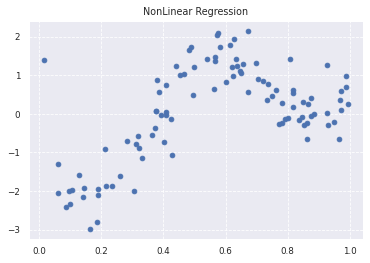

In [8]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')

0.28727295179756285


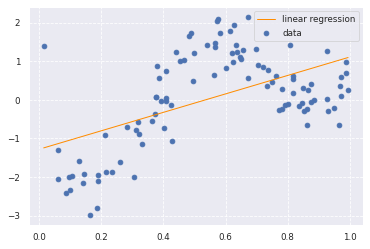

In [9]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


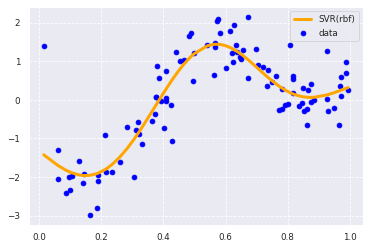

In [22]:
from sklearn.svm import SVR

clf = SVR(kernel='rbf', C=1.0, epsilon=0.2)
clf.fit(data, target)

p_svr= clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_svr, color='orange', linestyle='-', linewidth=3, markersize=6, label='SVR(rbf)')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


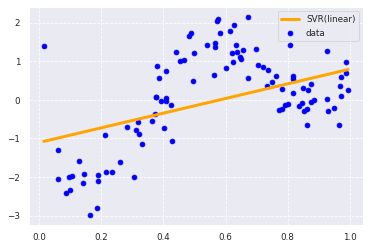

In [23]:

clf = SVR(kernel='linear', C=1.0, epsilon=0.2)
clf.fit(data, target)

p_svr= clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_svr, color='orange', linestyle='-', linewidth=3, markersize=6, label='SVR(linear)')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

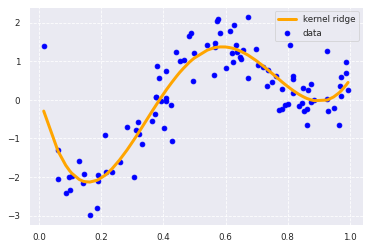

In [10]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.7872579472463268


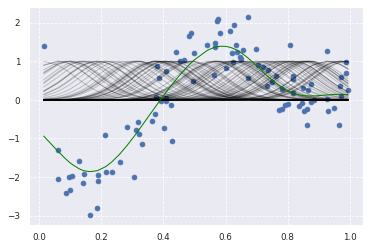

In [11]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

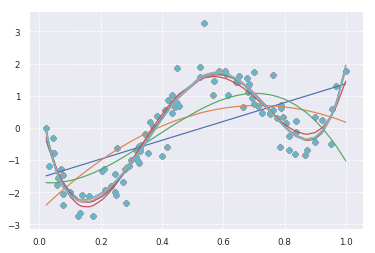

In [ ]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

-2.220446049250313e-16


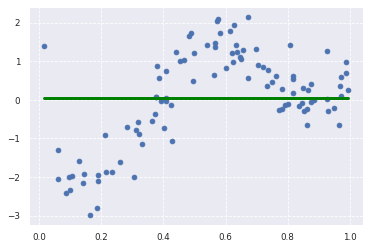

In [13]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


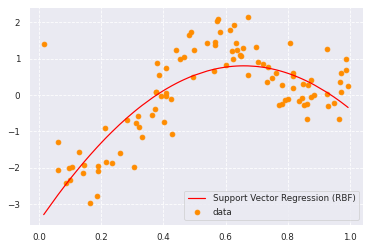

In [14]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)